In [1]:
 
import glob
from medpy.io import load 

from __future__ import print_function
#%matplotlib inline
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from sklearn.preprocessing import MinMaxScaler

# Set random seed for reproducibility
manualSeed = 999
#manualSeed = random.randint(1, 10000) # use if you want new results
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

Random Seed:  999


In [2]:
n_image = 25

## Read Files

In [3]:
dir_path = "./brats2015/BRATS2015_Training/BRATS2015_Training/HGG"

In [4]:
files_list = glob.glob(dir_path + "/*/*/*.mha")

In [5]:
files_list[:n_image]

['./brats2015/BRATS2015_Training/BRATS2015_Training/HGG\\brats_2013_pat0001_1\\VSD.Brain.XX.O.MR_Flair.54512\\VSD.Brain.XX.O.MR_Flair.54512.mha',
 './brats2015/BRATS2015_Training/BRATS2015_Training/HGG\\brats_2013_pat0001_1\\VSD.Brain.XX.O.MR_T1.54513\\VSD.Brain.XX.O.MR_T1.54513.mha',
 './brats2015/BRATS2015_Training/BRATS2015_Training/HGG\\brats_2013_pat0001_1\\VSD.Brain.XX.O.MR_T1c.54514\\VSD.Brain.XX.O.MR_T1c.54514.mha',
 './brats2015/BRATS2015_Training/BRATS2015_Training/HGG\\brats_2013_pat0001_1\\VSD.Brain.XX.O.MR_T2.54515\\VSD.Brain.XX.O.MR_T2.54515.mha',
 './brats2015/BRATS2015_Training/BRATS2015_Training/HGG\\brats_2013_pat0001_1\\VSD.Brain_3more.XX.O.OT.54517\\VSD.Brain_3more.XX.O.OT.54517.mha',
 './brats2015/BRATS2015_Training/BRATS2015_Training/HGG\\brats_2013_pat0002_1\\VSD.Brain.XX.O.MR_Flair.54518\\VSD.Brain.XX.O.MR_Flair.54518.mha',
 './brats2015/BRATS2015_Training/BRATS2015_Training/HGG\\brats_2013_pat0002_1\\VSD.Brain.XX.O.MR_T1.54519\\VSD.Brain.XX.O.MR_T1.54519.mha',


In [6]:

image_data, image_header = load(files_list[0])

In [7]:
image_data.shape


(240, 240, 155)

In [8]:
image_data.dtype


dtype('int16')

In [9]:
image_header.get_voxel_spacing()


(1.0, 1.0, 1.0)

In [10]:
image_header.get_offset()


(0.0, -239.0, 0.0)

## Preprocess images

In [11]:
img_list = []
image_data_list = []

In [12]:
for i in range(n_image):
    image_data, image_header = load(files_list[i])
    img_min, img_max = image_data.min(), image_data.max()
    image_data_list.append((image_data - img_min) / img_max)

In [13]:
image_data.shape

(240, 240, 155)

In [14]:
for i in range(70, 120): # go through the profonder
    image_tensors = torch.tensor([[img[:,:, i]] for img in image_data_list], dtype=torch.float32)
    grid_img = vutils.make_grid(image_tensors, padding=2, nrow=5)
    #print(grid_img.shape)
    img_list.append(grid_img)

In [15]:
len(img_list)

50

## Plot images

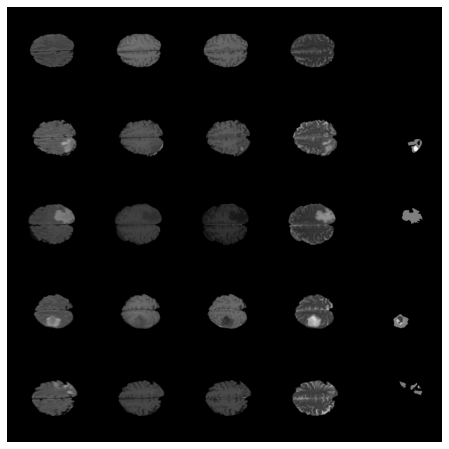

In [17]:
fig = plt.figure(figsize=(8,8))
plt.axis("off")
ims = [[plt.imshow(np.transpose(i,(1,2,0)), animated=True)] for i in img_list]
ani = animation.ArtistAnimation(fig, ims, interval=1000, repeat_delay=1000, blit=True)
HTML(ani.to_jshtml())